#The SEIR epidemic model
Prepared by Jayendran V (IEOR, IIT Bombay)

A  basic model for the spread of a disease is the Susceptible, Exposed, Infected, Recovered (SEIR) model. This model splits a population into four groups.

* $S(t)$ - the part of the population that is succeptible but not yet infected with the disease
* $E(t)$ - the part of the population that is exposed to the virus but not yet show any symptoms of the disease (i.e., virus is incubating)
* $I(t)$ - the part of the population that is infected with the disease
* $R(t)$ - the part of the population that has recovered from the disease.

The SEIR model uses a system of ODE's to describe how these four groups change over time. The model uses only the contact ratio $\beta$, the average incubation time $1/\alpha$ and the mean recovery time $1/\gamma$.

The python implementation of the SEIR model can be found below. It is based on the SIR version of the epidemics model that can be found at https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/.


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
# We will be using Scipy's ODEINT to do the simulation

In [ ]:
# The SEIR differential equations.
def SEIRmodel(y, t, N, beta, alpha, gamma):
  S, E, I, R = y
  dS_dt = -beta*S*I/N
  dE_dt = beta*S*I/N - alpha*E
  dI_dt = alpha*E - gamma*I
  dR_dt = gamma*I
  return dS_dt, dE_dt, dI_dt, dR_dt

Let's set the initial parameters and run the model

In [ ]:
#Initial conditions: You can change this to get different epidemic dynamics
N = 1000.     # Total Population
beta = 0.4   # the effective contact+infectivity rate
alpha = 1./3  # rate of showing symptoms
gamma = 1./15   # the mean recovery rate

#Initial population values
I0, E0, R0 = 1., 0, 0
S0 = N - I0 - R0 - E0

# Initial conditions vector
y0 = S0, E0, I0, R0

#timepoints, simulating for 200 time periods
t = np.linspace(0, 200, 200)

# Integrate/Simulate the SEIR equations over the time grid, t.
eqn = odeint(SEIRmodel, y0, t, args=(N, beta, alpha, gamma))

#Post processing
S, E, I, R = eqn.T

We can also plot the results.  

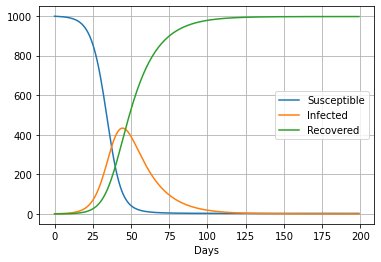

In [ ]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
plt.plot(S, label='Susceptible')
plt.plot(I, label='Infected')
plt.plot(R, label='Recovered')
plt.legend()
plt.xlabel('Days')
plt.grid()

Using the data we can also compute other metrics such as the maximum Infections, the time of maximum infections, the total Recovered, etc.

In [ ]:

print("Maximum infections: ", max(I))
peaktime = np.where(I==max(I))
print("The peak infection occurs on day ", peaktime[0][0])
print("The total people infected & recovered is ", R[-1])

Maximum infections:  433.4087850288814
The peak infection occurs on day  44
The total people infected & recovered is  997.4575477302687


By changing the above input values of beta, alpha, gamma, S0, and N we can  get different epidemic dynamics.  Try it!

## Creating a meta function

Scrolling up and changing the values each time is quite cumbersome.  We can write a meta-function that will do the simulation run as per given configuration.

Let's go ahead and write such a function.


In [ ]:
# This calls the SIRmodel function
def SEIRsim(N = 1000,     # Total Population, default = 1000
           beta = 0.25,   # the effective contact+infectivity rate
           alpha = 1./3,  # rate of showing symptoms
           gamma = 1./15    # the mean recovery rate
           ):
  #Initial conditions
  I0, E0, R0 = 1, 0, 0
  S0 = N - I0 - R0 - E0
  # Initial conditions vector
  y0 = S0, E0, I0, R0

  #timepoints
  t = np.linspace(0, 200, 200)

  # Integrate/Simulate the SIR equations over the time grid, t.
  eqn = odeint(SEIRmodel, y0, t, args=(N, beta, alpha, gamma))

  # Post processing
  S, E, I, R = eqn.T
  peaktime = np.where(I==max(I))

  #Return the SEIR timeseries, Max Infections and Time of Max Infections
  return S, E, I, R, max(I), peaktime[0][0]

Now we can call this SEIRsim model with different inputs more easily

In [ ]:
#Run the simulation model, with none or some or all the inputs. 
#For inputs that are unspecified, the default values will be used.
S, E, I, R, maxI, peaktime = SEIRsim()
print('Max infections is ', maxI, 'on day ', peaktime)

#Another set  #For inputs that are unspecified, the default values will be used.
S, E, I, R, maxI, peaktime = SEIRsim(beta=0.4, alpha=1/5)
print('Max infections is ', maxI, 'on day ', peaktime)

Max infections is  313.4422179074157 on day  66
Max infections is  384.1814747356115 on day  53


Now if we plot, it will plot only the last run (note that S, E, I, R get overwritten when we call it each time)

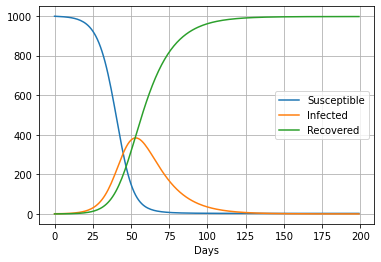

In [ ]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
plt.plot(S, label='Susceptible')
plt.plot(I, label='Infected')
plt.plot(R, label='Recovered')
plt.legend()
plt.xlabel('Days')
plt.grid()